In [1]:
import numpy
import plotly.figure_factory as ff
import plotly.graph_objects as go

import sys
import sys
import pathlib
sys.path.append(str(pathlib.Path("").resolve().parent / "build" / "release" / "python"))  # noqa

from ipctk import *

In [2]:
ea0, ea1, eb0, eb1 = (numpy.random.random(3) for i in range(4))
edge_edge_distance(ea0, ea1, eb0, eb1)

0.04877260961455899

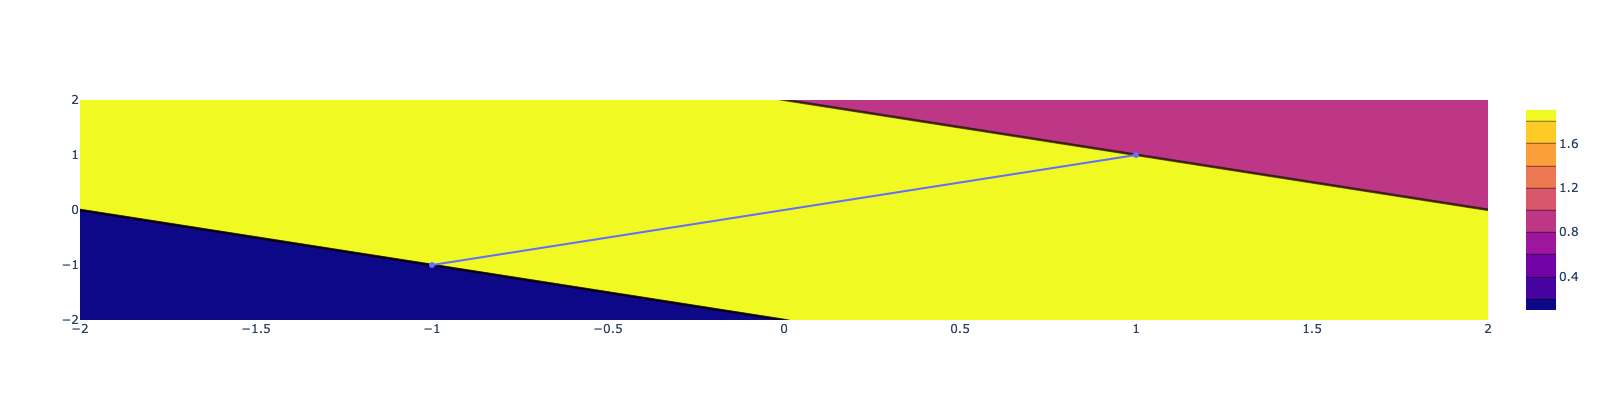

In [3]:
e0 = numpy.array([-1.0, -1.0])
e1 = numpy.array([1.0, 1.0])
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
dtypes = numpy.empty((xs.size, ys.size), dtype=int)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        dtypes[j, i] = point_edge_distance_type(
            numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=dtypes, x=xs, y=ys)
], layout=go.Layout(width=400, height=400))
fig.show()

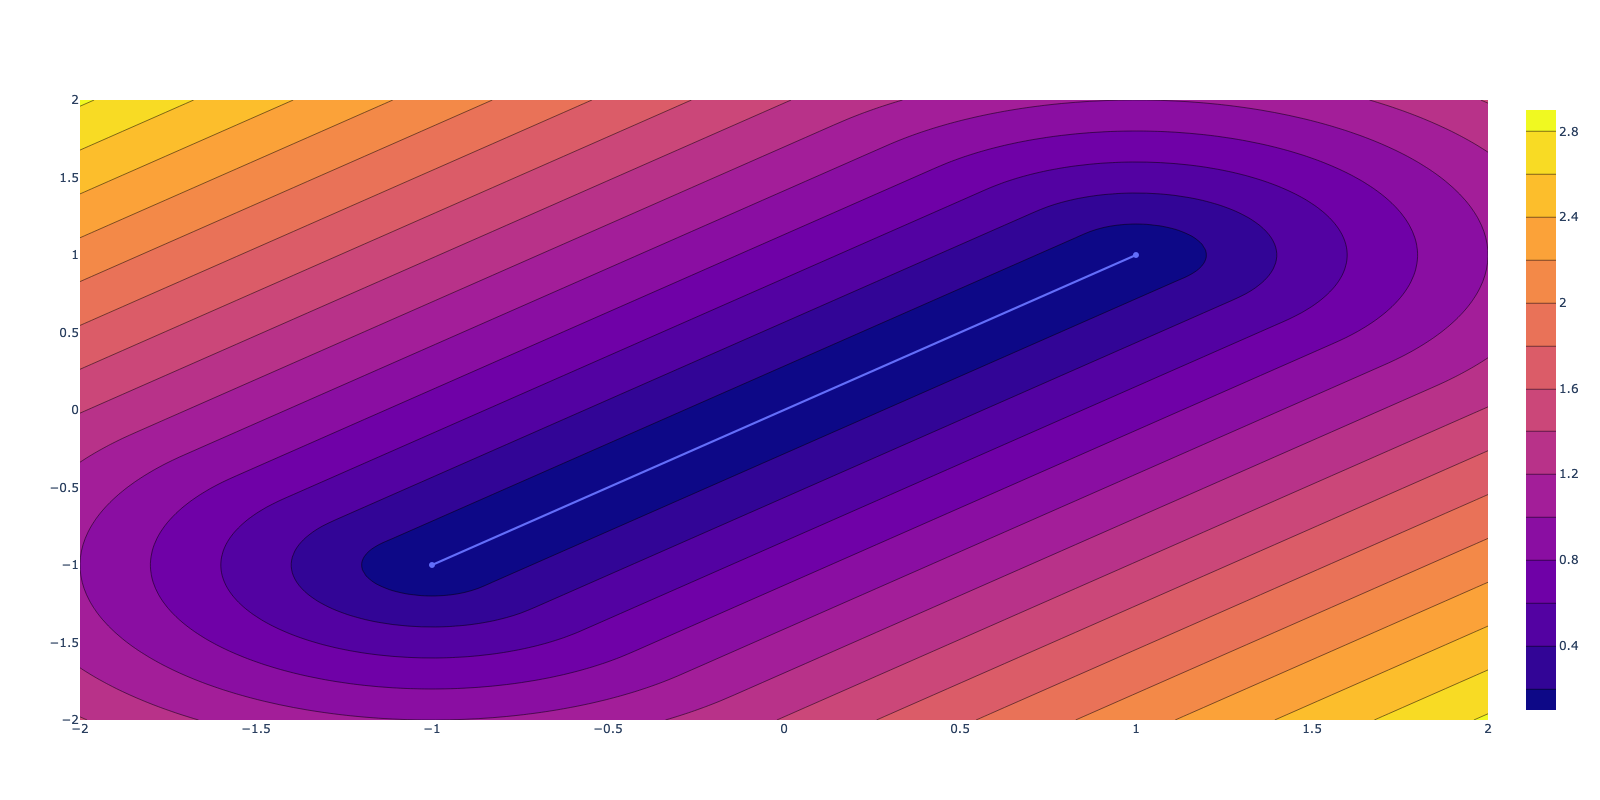

In [4]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_edge_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

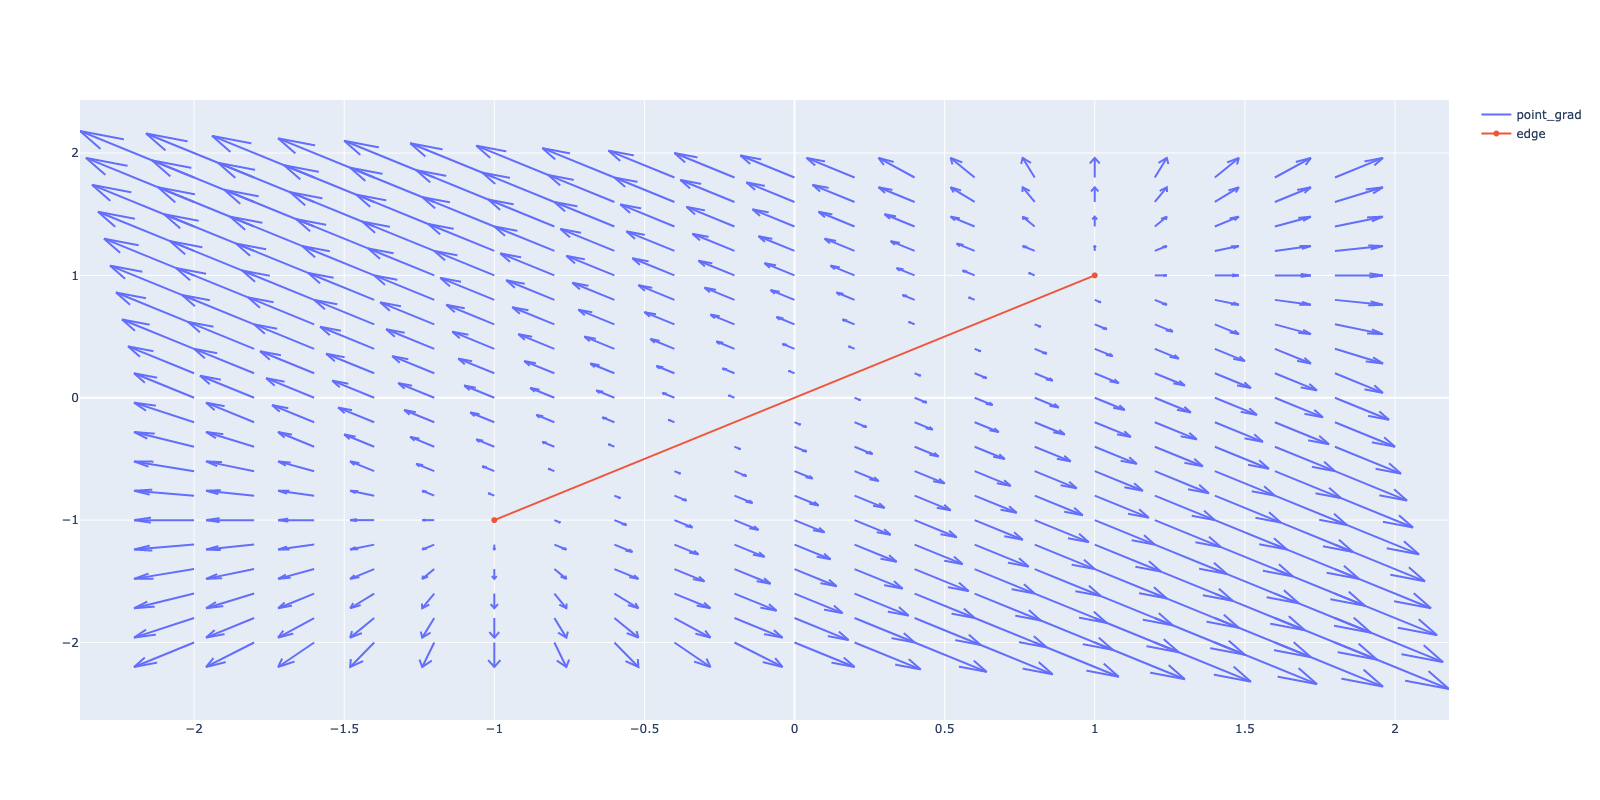

<ipython-input-5-6e9810e5f2d5>:19: RuntimeWarning:

invalid value encountered in true_divide



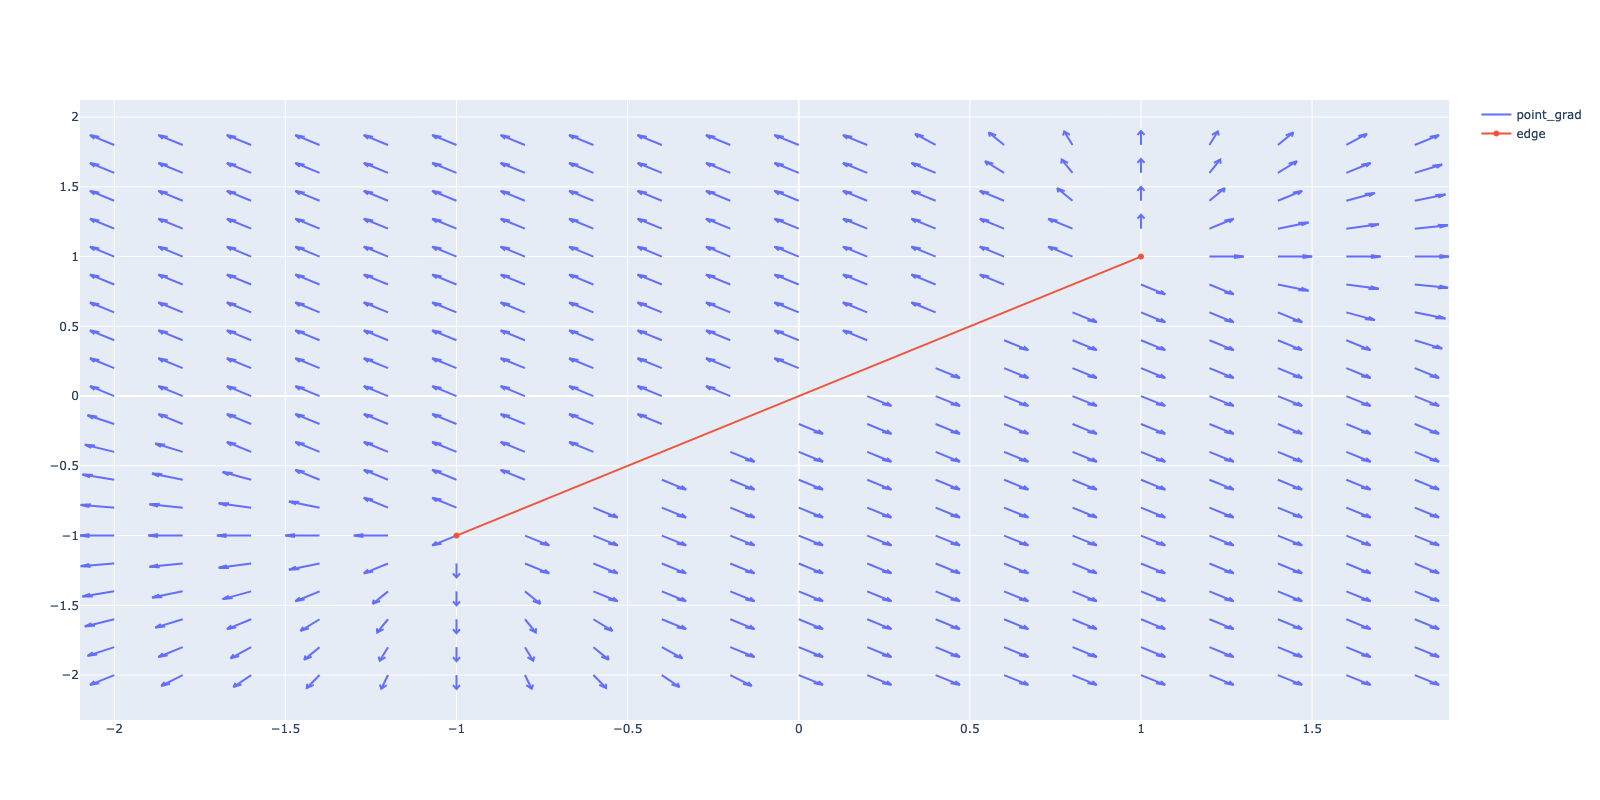

In [5]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_edge_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), e0, e1)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[i, j] = numpy.sqrt(point_edge_distance(
            numpy.array([x[i, j], y[i, j]]), e0, e1))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

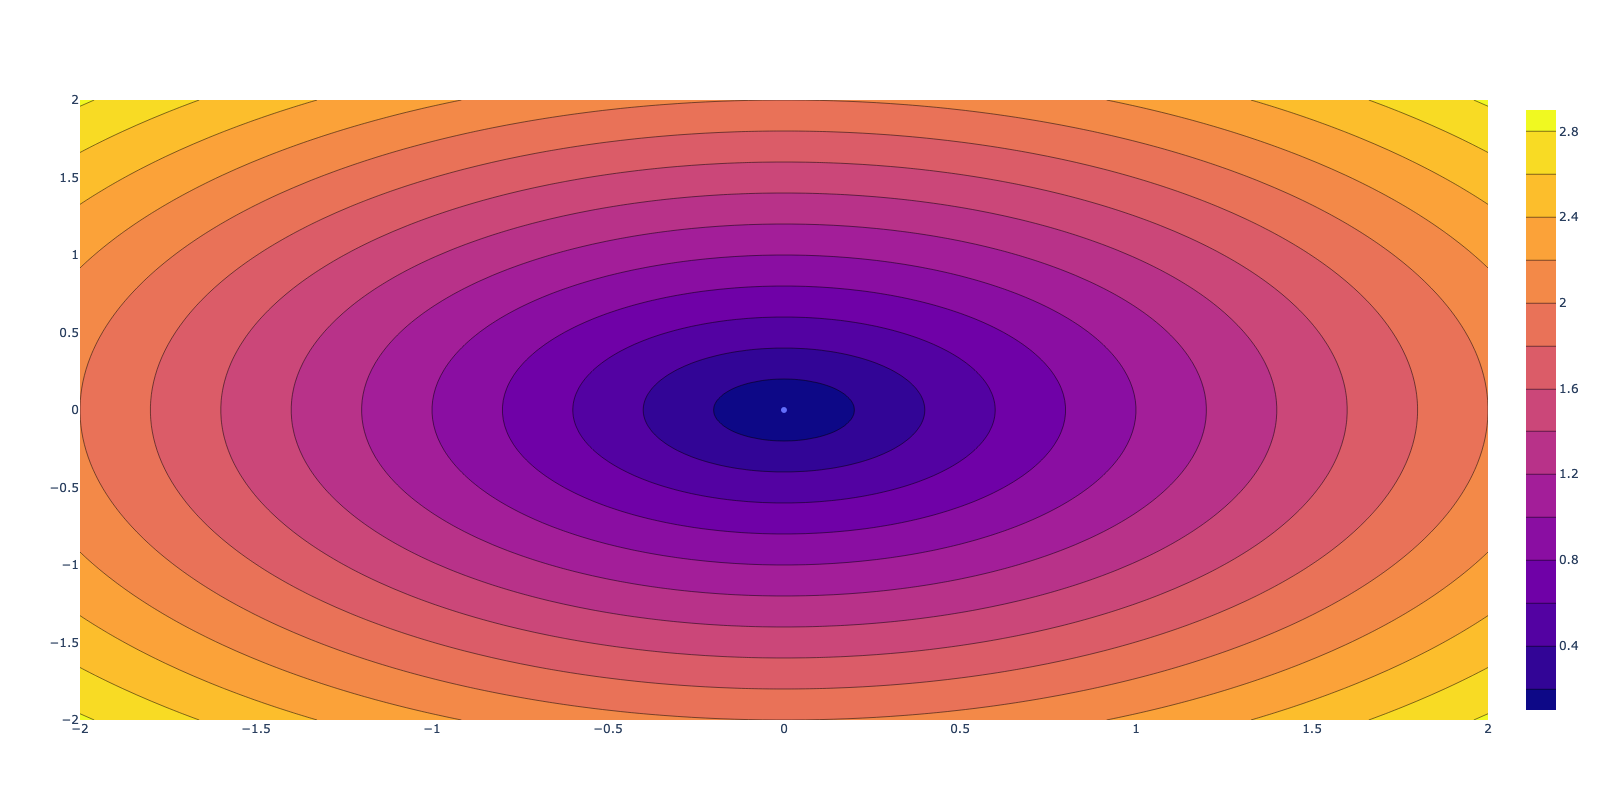

In [6]:
p = numpy.array([0, 0], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_point_distance(numpy.array([x, y]), p)
fig = go.Figure(data=[
    go.Scatter(x=[p[0]], y=[p[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

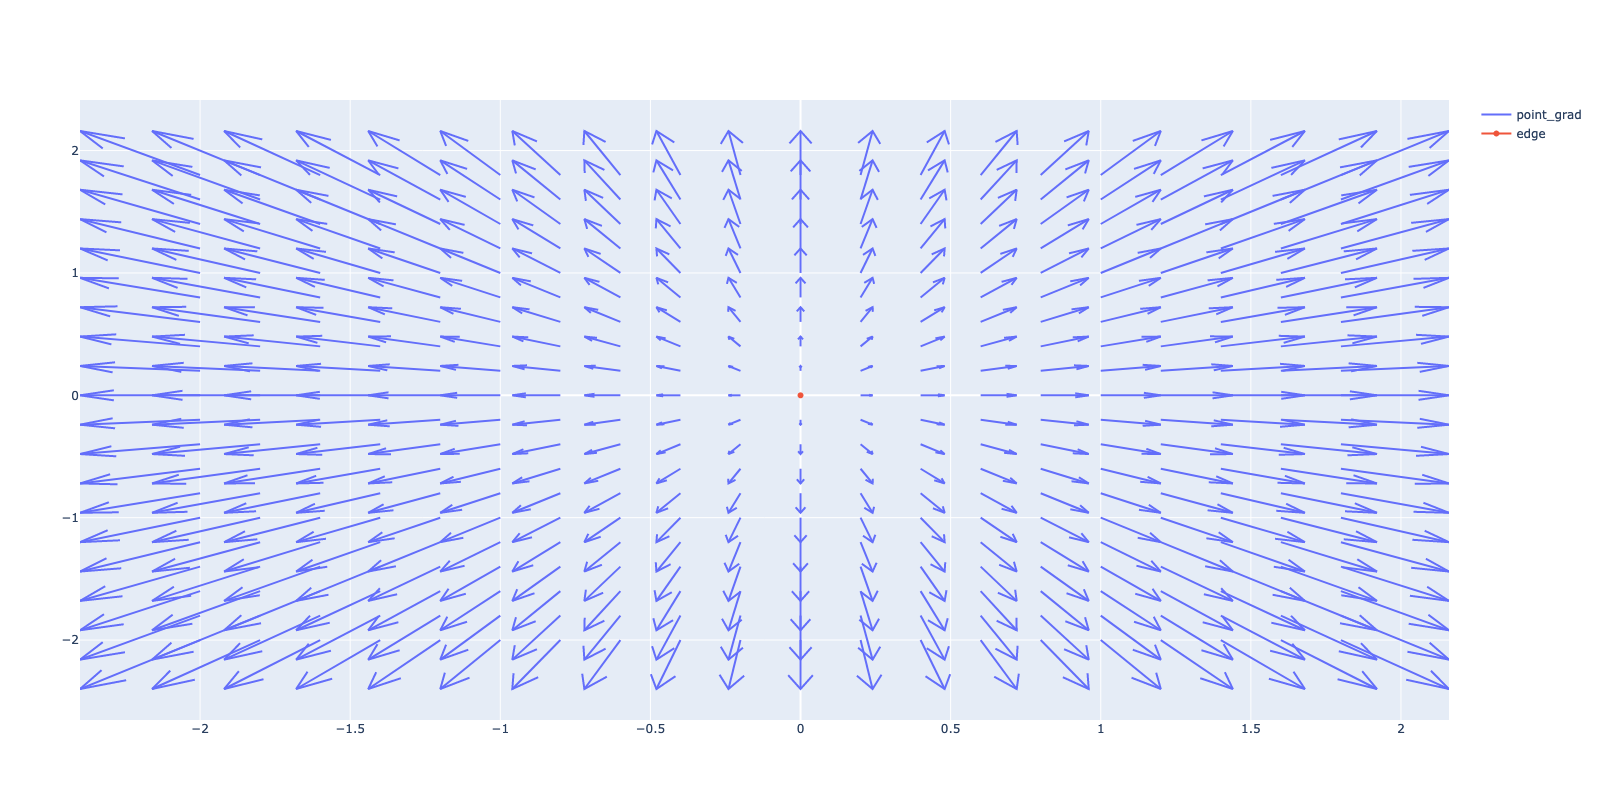

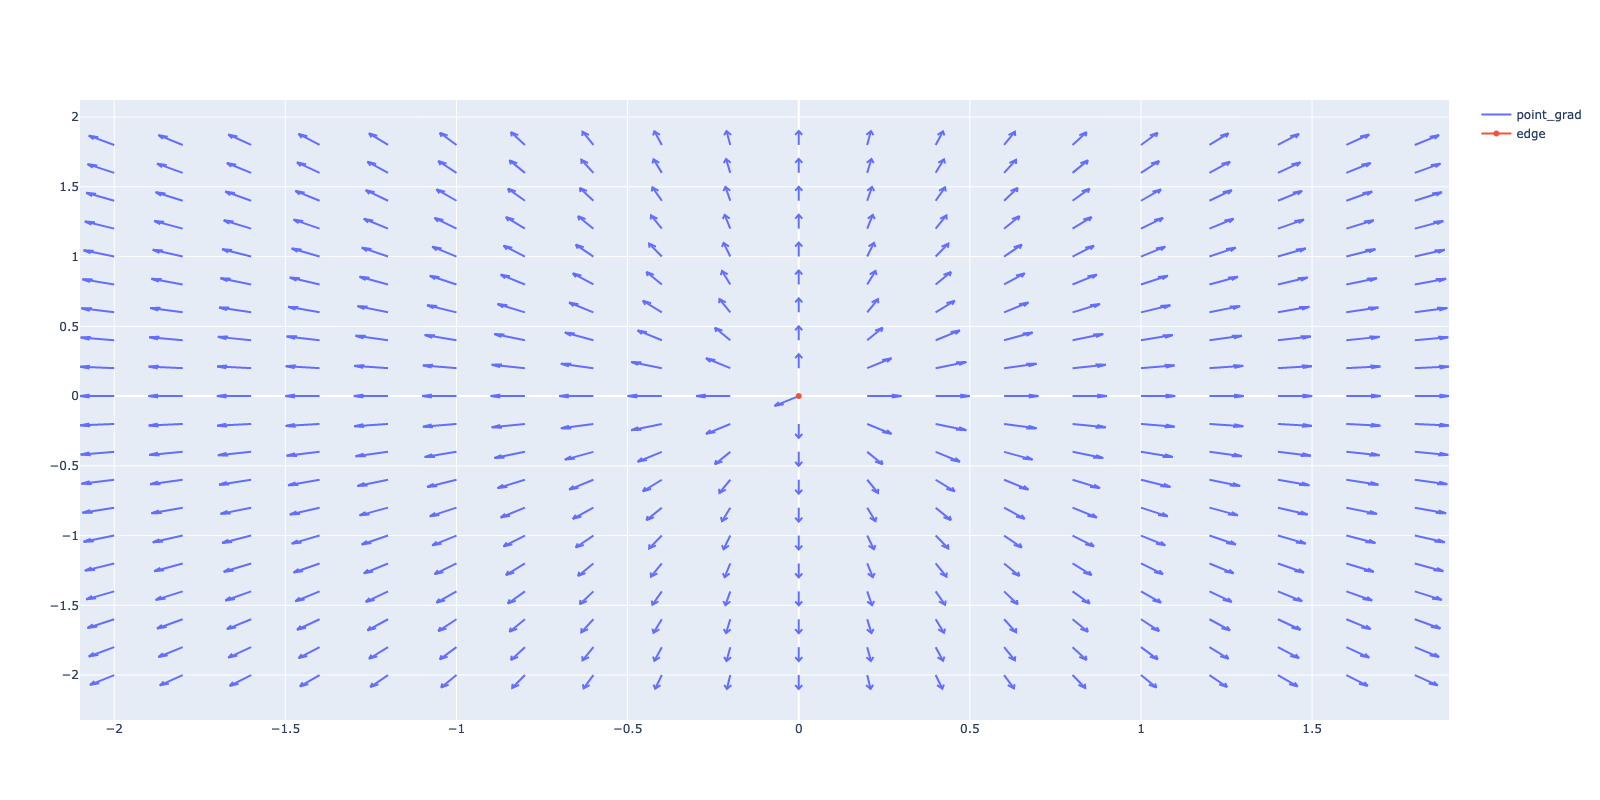

In [7]:
p = numpy.array([0, 0], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_point_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), p)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[j, i] = numpy.sqrt(point_point_distance(
            numpy.array([x[i, j], y[i, j]]), p))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

In [8]:
ea0 = numpy.random.random(3)
ea1 = numpy.random.random(3)
eb0 = numpy.random.random(3)
eb1 = numpy.random.random(3)

print(edge_edge_distance(ea0, ea1, eb0, eb1))
print(edge_edge_distance_gradient(ea0, ea1, eb0, eb1))
print(edge_edge_distance_hessian(ea0, ea1, eb0, eb1))

0.254949438376472
[ 0.24292049 -0.43056442  0.5827115   0.07810077 -0.13842971  0.18734615
 -0.19155025  0.33951325 -0.45948588 -0.12947101  0.22948089 -0.31057176]
[[ 5.60363562e-01 -4.94366537e-01  6.66863002e-01 -7.23742854e-02
   2.88663803e-01 -3.91374025e-01 -4.22152870e-01  3.54886446e-01
  -4.78559725e-01 -6.58364074e-02 -1.49183712e-01  2.03070749e-01]
 [-4.94366537e-01 -7.94648642e-03  1.46470762e-02 -3.70570068e-01
   3.72544300e-01 -5.02937519e-01  6.99685474e-01 -5.42949398e-01
   7.31740164e-01  1.65251131e-01  1.78351584e-01 -2.43449722e-01]
 [ 6.66863002e-01  1.46470762e-02 -2.50909337e-02  5.03713298e-01
  -5.08081575e-01  6.85926903e-01 -3.29388412e-01 -3.59753697e-01
   4.91032667e-01 -8.41187888e-01  8.53188196e-01 -1.15186864e+00]
 [-7.23742854e-02 -3.70570068e-01  5.03713298e-01 -2.13506981e-01
   2.18046454e-01 -2.94390706e-01  7.11863920e-02  2.67184095e-01
  -3.63329759e-01  2.14694875e-01 -1.14660481e-01  1.54007167e-01]
 [ 2.88663803e-01  3.72544300e-01 -5.08

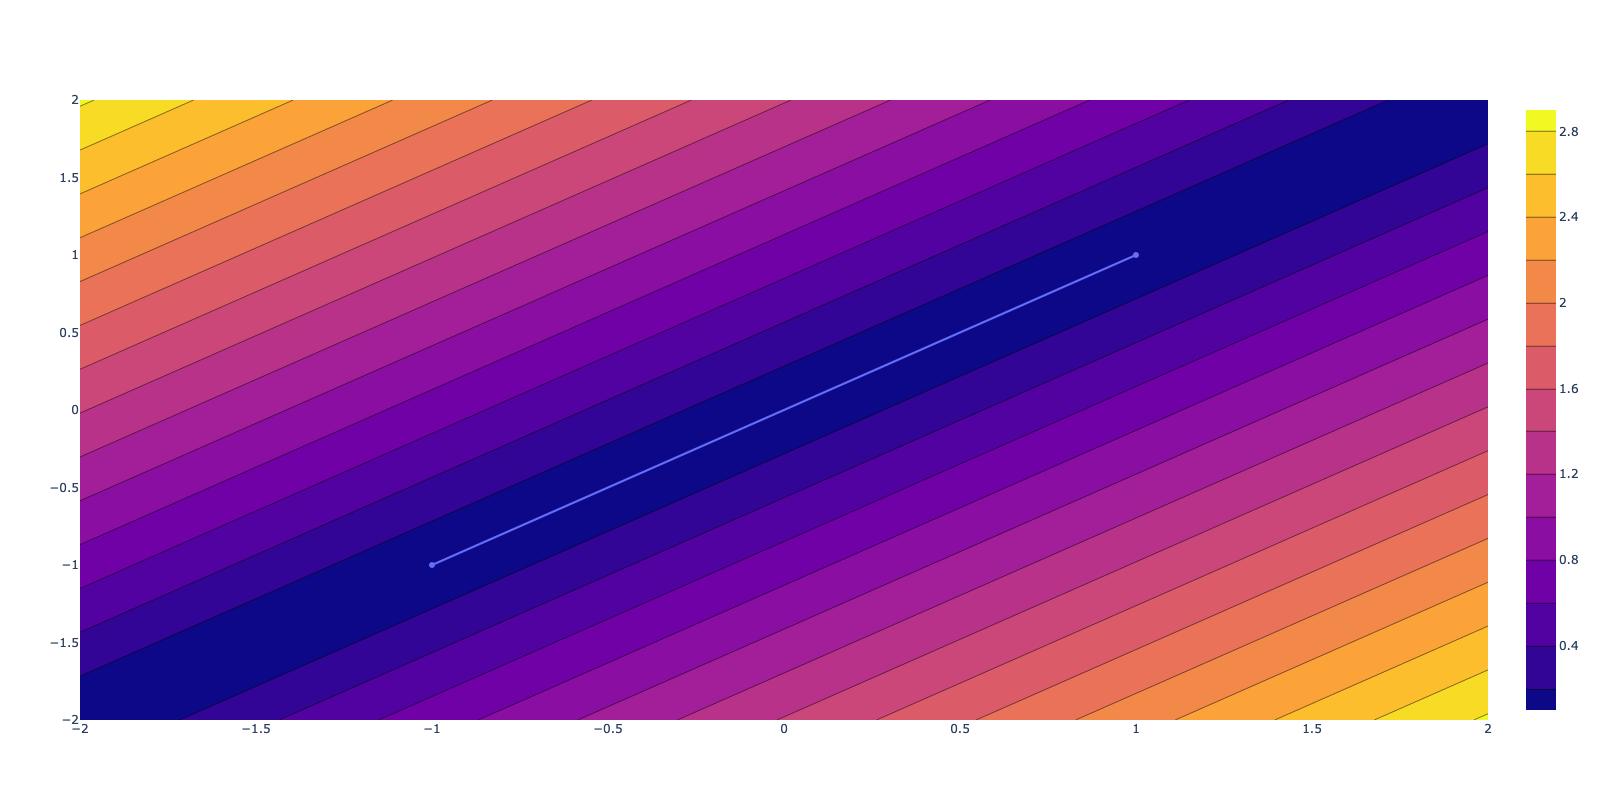

In [9]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_line_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

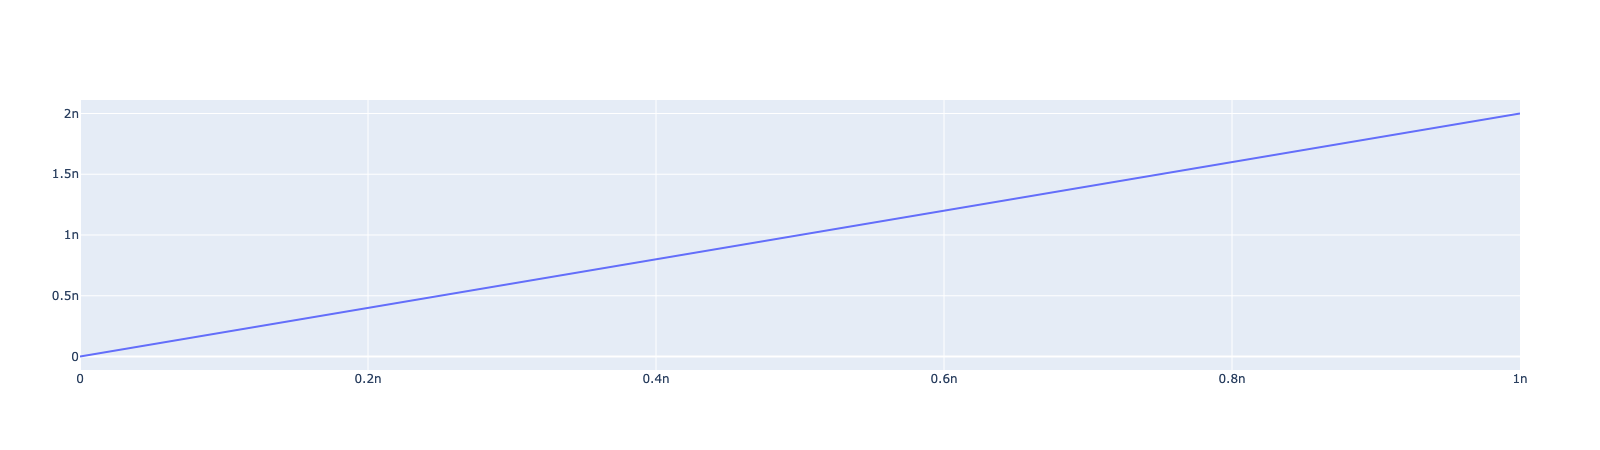

In [10]:
x = numpy.linspace(0, 1e-9)
y = numpy.asarray(list(map(lambda x: edge_edge_mollifier(x, eps_x=1), x)))
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

In [ ]:
d = numpy.geomspace(1e-12, 0.2, 1000)
dhat = 0.1
b = numpy.vectorize(lambda x: barrier(x, dhat))(d)
b_grad = numpy.vectorize(lambda x: barrier_gradient(x, dhat))(d)
b_hess = numpy.vectorize(lambda x: barrier_hessian(x, dhat))(d)
fig = go.Figure(data=[go.Scatter(x=d, y=b, name="b(x)"), go.Scatter(x=d, y=b_grad, name=r"\nabla b(x)"), go.Scatter(x=d, y=b_hess, name=r"\nabla^2 b(x)")])
fig.update_layout(yaxis_range=[-1000, 1000])
fig.show()